# Clasificación de imágenes con KNN

In [2]:
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
session = tf.Session()

In [4]:
mnist = input_data.read_data_sets("../../datasets/MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../../datasets/MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../../datasets/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ../../datasets/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../../datasets/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [42]:
train_size = 50000
test_size = 120

In [43]:
rand_train_idx = np.random.choice(len(mnist.train.images), train_size, replace=False)
rand_test_idx = np.random.choice(len(mnist.test.images), test_size, replace=False)

In [44]:
x_vals_train = mnist.train.images[rand_train_idx]
x_vals_test = mnist.test.images[rand_test_idx]
y_vals_train = mnist.train.labels[rand_train_idx]
y_vals_test = mnist.test.labels[rand_test_idx]

In [45]:
k = 4
batch_size = 6

In [46]:
x_data_train = tf.placeholder(shape = [None, 784], dtype=tf.float32)
x_data_test = tf.placeholder(shape = [None, 784], dtype = tf.float32)

y_target_train = tf.placeholder(shape = [None, 10], dtype = tf.float32)
y_target_test = tf.placeholder(shape = [None, 10], dtype=tf.float32)

In [47]:
distance = tf.reduce_sum(tf.abs(tf.subtract(x_data_train, tf.expand_dims(x_data_test,1))), reduction_indices=2)

In [48]:
top_k_xvals, top_k_idx = tf.nn.top_k(tf.negative(distance), k = k)
prediction_idx = tf.gather(y_target_train, top_k_idx)
count_of_preds = tf.reduce_sum(prediction_idx, reduction_indices=1)
prediction = tf.argmax(count_of_preds)

In [49]:
num_of_loops = int(np.ceil(len(x_vals_test))/batch_size)
num_of_loops

20

In [50]:
test_output = []
actual_vals = []
for i in range(num_of_loops):
    min_idx = i*batch_size
    max_idx = min((i+1)*batch_size, len(x_vals_test))
    
    x_batch = x_vals_test[min_idx:max_idx]
    y_batch = y_vals_test[min_idx:max_idx]
    
    predictions = session.run(prediction, feed_dict={x_data_train:x_vals_train,    x_data_test: x_batch,
                                                     y_target_train: y_vals_train, y_target_test: y_batch})
    test_output.extend(predictions)
    actual_vals.extend(np.argmax(y_batch, axis=1))

In [51]:
accuracy = sum([1./test_size for i in range(test_size) if test_output[i] == actual_vals[i]])
print("La precisión del algoritmo para k = "+str(k)+" ha sido de: "+str(accuracy))

La precisión del algoritmo para k = 4 ha sido de: 0.11666666666666665


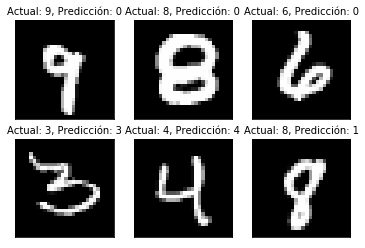

In [52]:
actuals = np.argmax(y_batch, axis = 1)
n_row = 2
n_col = 3

for i in range(len(actuals)):
    plt.subplot(n_row, n_col, i+1)
    plt.imshow(np.reshape(x_batch[i], [28,28]), cmap = "Greys_r")
    plt.title("Actual: "+str(actuals[i])+", Predicción: "+str(predictions[i]), fontsize=10)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)